Este colab fue adaptado por Arnold Charry Armero.

# Modelo FB Prophet - Pronósticos

El Modelo FB Prophet es un método de pronóstico avanzado introducido por Facebook para tratar demandas en las que se presente un fuerte patrón de estacionalidad. Este modelo toma en cuentas las tendencias de una manera no lineal, lo que se conoce en el mundo del Machine Learning como **curve fitting** para realizar los pronósticos de una manera exacta. El modelo matemático básico general se compone por tres funciones y el error de la siguiente manera:

$$ y_{t} = g(t) + s(t) + h(t) + \varepsilon_{t} $$

donde,

$ t = \mathrm{Valor \: en \: la \: serie \: de \: tiempo} $

$ y_{t} = \mathrm{Pronostico \: en \: el \: momento \:} t$

$ g(t) = \mathrm{Funcion \: a \: trozos \: con \: tendencia \: lineal} $

$ s(t) = \mathrm{Descripcion \: de \: patrones \: estacionales} $

$ h(t) = \mathrm{Efecto \: de \: los \: días \: festivos} $

$ \varepsilon_{t} = \mathrm{Error \: en \: el \: momento \:} t $

In [15]:
!python -m pip install prophet

In [16]:
#Se importan las librerias
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import dates as mpl_dates
from prophet.plot import plot_plotly, plot_components_plotly
from prophet import Prophet

In [17]:
#Conectamos con Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [101]:
#Se ingresa la base de datos
df = pd.read_csv("/content/drive/MyDrive/Operations I/sales-cars.csv")
df.head(10)

,Month,Sales
0,2016-01,266.0
1,2016-02,146.0
2,2016-03,183.0
3,2016-04,119.0
4,2016-05,180.0
5,2016-06,169.0
6,2016-07,232.0
7,2016-08,225.0
8,2016-09,193.0
9,2016-10,123.0


In [102]:
#Se debe cambiar los índices a ds y y para que funcione
df1 = df.copy()
df_back = df.copy()
df1.columns = ['ds','y']
df1['ds'] = pd.to_datetime(df1['ds'], format = '%Y/%m')
df1.head(10)

,ds,y
0,2016-01-01,266.0
1,2016-02-01,146.0
2,2016-03-01,183.0
3,2016-04-01,119.0
4,2016-05-01,180.0
5,2016-06-01,169.0
6,2016-07-01,232.0
7,2016-08-01,225.0
8,2016-09-01,193.0
9,2016-10-01,123.0


In [103]:
#Se pasa al formato de series de tiempo
df["Month"] = pd.to_datetime(df.iloc[:, 0], format = '%Y/%m')
df.head(10)

,Month,Sales
0,2016-01-01,266.0
1,2016-02-01,146.0
2,2016-03-01,183.0
3,2016-04-01,119.0
4,2016-05-01,180.0
5,2016-06-01,169.0
6,2016-07-01,232.0
7,2016-08-01,225.0
8,2016-09-01,193.0
9,2016-10-01,123.0


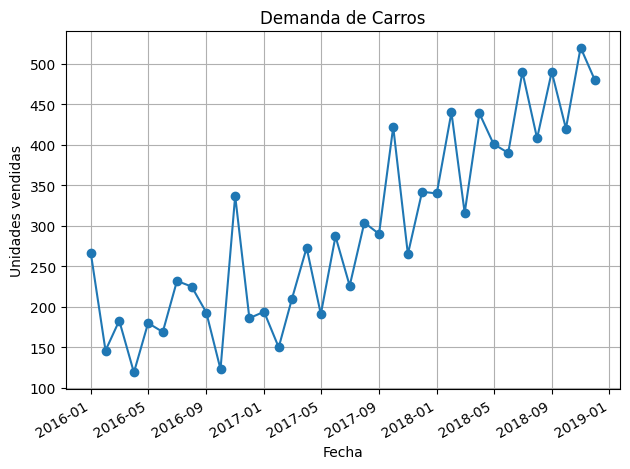

In [104]:
#Se realiza el gráfico de los datos
plt.plot_date(df.iloc[:, 0], df.iloc[:, 1], linestyle = 'solid')
plt.gcf().autofmt_xdate()

plt.title("Demanda de Carros")
plt.xlabel("Fecha")
plt.ylabel("Unidades vendidas")

plt.grid()
plt.tight_layout()
plt.show()

In [105]:
#Se divide la base de datos en dos. Una parte de entrenamiento y la otra de pronósticos
train = df1.iloc[:len(df)-10]
test = df1.iloc[len(df)-10:]

In [106]:
#Se realiza el pronóstico
m = Prophet()
m.fit(train)
future = m.make_future_dataframe(periods=10, freq = 'MS') #MS for monthly, H for hourly
forecast = m.predict(future)
forecast.head(10)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 20.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4el6st3x/xa7vtxpu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4el6st3x/vfi1cb7h.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=48047', 'data', 'file=/tmp/tmp4el6st3x/xa7vtxpu.json', 'init=/tmp/tmp4el6st3x/vfi1cb7h.json', 'output', 'file=/tmp/tmp4el6st3x/prophet_model8csx5q22/prophet_model-20240204021855.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:18:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:18:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2016-01-01,136.282080,218.860751,287.940032,136.282080,136.282080,116.978838,116.978838,116.978838,116.978838,116.978838,116.978838,0.0,0.0,0.0,253.260918
1,2016-02-01,145.986111,134.501421,203.164297,145.986111,145.986111,24.408651,24.408651,24.408651,24.408651,24.408651,24.408651,0.0,0.0,0.0,170.394763
2,2016-03-01,155.064076,135.975980,205.190059,155.064076,155.064076,16.674235,16.674235,16.674235,16.674235,16.674235,16.674235,0.0,0.0,0.0,171.738311
3,2016-04-01,164.768107,73.590728,143.728006,164.768107,164.768107,-56.202924,-56.202924,-56.202924,-56.202924,-56.202924,-56.202924,0.0,0.0,0.0,108.565183
4,2016-05-01,174.159105,123.208867,192.586320,174.159105,174.159105,-15.366415,-15.366415,-15.366415,-15.366415,-15.366415,-15.366415,0.0,0.0,0.0,158.792690
5,2016-06-01,183.863136,111.756820,177.497128,183.863136,183.863136,-41.056071,-41.056071,-41.056071,-41.056071,-41.056071,-41.056071,0.0,0.0,0.0,142.807065
6,2016-07-01,193.254134,174.184631,238.683677,193.254134,193.254134,12.673894,12.673894,12.673894,12.673894,12.673894,12.673894,0.0,0.0,0.0,205.928028
7,2016-08-01,202.958166,172.095779,237.194051,202.958166,202.958166,3.073836,3.073836,3.073836,3.073836,3.073836,3.073836,0.0,0.0,0.0,206.032002
8,2016-09-01,212.662197,149.020079,215.452509,212.662197,212.662197,-29.409348,-29.409348,-29.409348,-29.409348,-29.409348,-29.409348,0.0,0.0,0.0,183.252849
9,2016-10-01,222.053195,90.612551,159.356138,222.053195,222.053195,-96.683188,-96.683188,-96.683188,-96.683188,-96.683188,-96.683188,0.0,0.0,0.0,125.370007


In [107]:
forecast = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
forecast.head(36)

,ds,yhat,yhat_lower,yhat_upper
0,2016-01-01,253.260918,218.860751,287.940032
1,2016-02-01,170.394763,134.501421,203.164297
2,2016-03-01,171.738311,135.975980,205.190059
3,2016-04-01,108.565183,73.590728,143.728006
4,2016-05-01,158.792690,123.208867,192.586320
5,2016-06-01,142.807065,111.756820,177.497128
6,2016-07-01,205.928028,174.184631,238.683677
7,2016-08-01,206.032002,172.095779,237.194051
8,2016-09-01,183.252849,149.020079,215.452509
9,2016-10-01,125.370007,90.612551,159.356138


In [108]:
#Se imprime la predicción con movilidad a diferentes periodos de tiempo
plot_plotly(m ,forecast)

In [109]:
#Se inserta el pronóstico en el Dataframe original
df.insert(loc = 2, column = "Pronóstico Prophet", value = forecast['yhat'])
df

,Month,Sales,Pronóstico Prophet
0,2016-01-01,266.0,253.260918
1,2016-02-01,146.0,170.394763
2,2016-03-01,183.0,171.738311
3,2016-04-01,119.0,108.565183
4,2016-05-01,180.0,158.792690
5,2016-06-01,169.0,142.807065
6,2016-07-01,232.0,205.928028
7,2016-08-01,225.0,206.032002
8,2016-09-01,193.0,183.252849
9,2016-10-01,123.0,125.370007


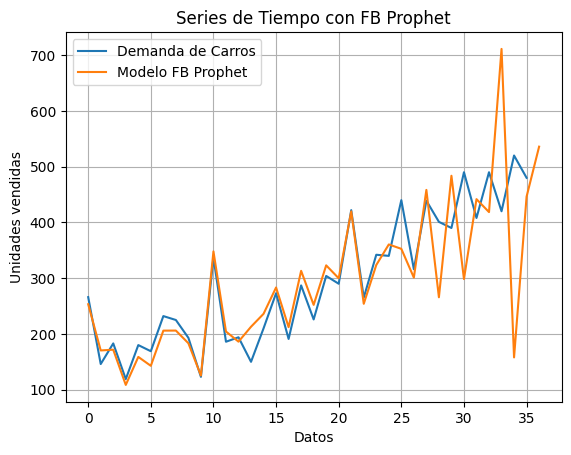

In [110]:
#Graficamos varios de los resultados
plt.plot(df.iloc[:, 1], label = 'Demanda de Carros')
plt.plot(df.iloc[:, 2], label = 'Modelo FB Prophet')
plt.grid()
plt.legend(loc = 'best')
plt.title('Series de Tiempo con FB Prophet')
plt.xlabel("Datos")
plt.ylabel("Unidades vendidas")
plt.show()

### Errores de Pronóstico

Para tener los errores, se comparan los valores reales de demanda con los valores pronosticados. De tal forma que se modela matemáticamente como,

$$ \mathrm{Error \: de \: Pronostico} = \begin{vmatrix}
\mathrm{Demanda \: Real} - \mathrm{Valor \: Pronosticado}
\end{vmatrix} $$

$$ \mathrm{Error \: de \: Pronostico} = \begin{vmatrix}
D_{t} - F_{t}
\end{vmatrix} $$

In [111]:
# Se calculan los errores

def Errores(number_column, forecast_column):
  """
  Calcula los errores tomando en cuenta los n valores anteriores

  Args:
    number_column: Número de la columna seleccionada del dataframe.
    forecast_column: Número de la columna en la que se hizo el pronóstico.
  Returns:
    Errors: lista con los errores de los respectivos pronósticos.
  """

  Errors = []
  l = len(df.iloc[:, number_column])

  for i in range(l):
    Error = np.abs(df.iloc[i, number_column] - df.iloc[i, forecast_column])
    Errors.append(Error)

  return Errors

In [112]:
df.insert(loc = 3, column = "Errores (OPI Función)", value = Errores(1, 2))
df

,Month,Sales,Pronóstico Prophet,Errores (OPI Función)
0,2016-01-01,266.0,253.260918,12.739082
1,2016-02-01,146.0,170.394763,24.394763
2,2016-03-01,183.0,171.738311,11.261689
3,2016-04-01,119.0,108.565183,10.434817
4,2016-05-01,180.0,158.792690,21.207310
5,2016-06-01,169.0,142.807065,26.192935
6,2016-07-01,232.0,205.928028,26.071972
7,2016-08-01,225.0,206.032002,18.967998
8,2016-09-01,193.0,183.252849,9.747151
9,2016-10-01,123.0,125.370007,2.370007


### MAD

Una medida muy importante utilizada para medir el error global de un tipo de pronóstico es el MAD, el cual es el promedio de los errores. Matemáticamente se define así:

$$ \mathrm{MAD} = \frac{\sum \begin{vmatrix}
\mathrm{Demanda \: Real} - \mathrm{Valor \: Pronosticado}
\end{vmatrix}}{n} $$

In [174]:
def MAD_Prophet(n):
  """
  Calcula el MAD de Modelo Prophet tomando
  en cuenta los n datos anteriores ingresados.

  Args:
    n: Cantidad entera de n observaciones anteriores
    tomadas en cuenta

  Returns:
    mad: Número float con la desviación absoluta media (MAD).
  """
  df_MAD = df_back.copy()
  df_MAD.columns = ['ds','y']
  df_MAD['ds'] = pd.to_datetime(df_MAD['ds'])
  train = df_MAD.iloc[:n + 1]
  test = df_MAD.iloc[n + 1:]

  m = Prophet()
  m.fit(train)
  future = m.make_future_dataframe(periods = df.shape[0] - n, freq = 'MS') #MS for monthly, H for hourly
  forecast = m.predict(future)
  forecast.head(10)
  prophet_forecast = list(forecast['yhat'])

  Errors = []
  l = len(df.iloc[:, 1])

  for i in range(l - 1):
    Error = np.abs(df.iloc[i, 1] - prophet_forecast[i])
    Errors.append(Error)

  Sum = 0

  for i in range(l - 1):
    Sum += Errors[i]

  mad = Sum / (l - 1)

  return mad

In [175]:
#Se calcula el MAD
MAD_Prophet(26)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 20.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4el6st3x/8u4efj8h.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4el6st3x/49d4xc5k.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=48955', 'data', 'file=/tmp/tmp4el6st3x/8u4efj8h.json', 'init=/tmp/tmp4el6st3x/49d4xc5k.json', 'output', 'file=/tmp/tmp4el6st3x/prophet_modelhnwirht9/prophet_model-20240204024649.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:46:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:46:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:

49.681116287309074

### Optimización del $n$

Ahora bien, haciéndo uso de los conocimientos de Analítica I y Matemáticas Aplicadas I, se puede minimizar la función objetivo MAD para obtener el mínimo error.

$ \mathbf{f.o.} $
$$ \mathit{min} \: \: \mathrm{MAD} = \frac{\sum \begin{vmatrix}
\mathrm{Demanda \: Real} - \mathrm{Valor \: Pronosticado}
\end{vmatrix}}{n} $$

$ \mathbf{s.a.} $
$$ n <  N $$
donde,

$ N = \mathrm{Total \: de \: datos} $

In [176]:
#Ahora se va a buscar el n óptimo que minimiza el MAD
x = np.arange(2, len(df.iloc[:, 1]) - 2, 1)
y = [MAD_Prophet(n) for n in x]

min = None

for i in range(len(y)):
  if min is None or min > y[i]:
    min = y[i]
    minx = x[i]

print("El mínimo MAD es de {} con un n de {}.".format(min, minx))

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 1.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4el6st3x/4x91ba0_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4el6st3x/s_f83k76.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=60386', 'data', 'file=/tmp/tmp4el6st3x/4x91ba0_.json', 'init=/tmp/tmp4el6st3x/s_f83k76.json', 'output', 'file=/tmp/tmp4el6st3x/prophet_modelzvn934_x/prophet_model-20240204024824.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:48:24 - cmdstanpy - INFO - Chain [1] start processing
IN

El mínimo MAD es de 35.06571363596448 con un n de 34.


### Referencias

*   12.2 Prophet model | Forecasting: Principles and Practice (3rd ed). (n.d.). https://otexts.com/fpp3/prophet.html
*   Nachiketa Hebbar. (2022, January 12). Time series Forecasting using FB Prophet| Complete Python Tutorial| [Video]. YouTube. https://www.youtube.com/watch?v=2vF2xTUXJwM
*   Prophet. (n.d.). Prophet. https://facebook.github.io/prophet/

